In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
len(boston_df)

506

In [5]:
# Task 4: Generate Descriptive Stats and Viz. 

Text(0, 0.5, 'MEDV (k$)')

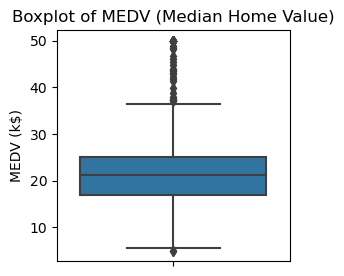

In [6]:
# 4.1. For the "Median value of owner-occupied homes" provide a boxplot
# plt.boxplot(boston_df["MEDV"])
# boston_df["MEDV"].plot(kind='box', figsize=(3,3))
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(ax=ax, y=boston_df["MEDV"])
plt.title("Boxplot of MEDV (Median Home Value)")
plt.ylabel('MEDV (k$)')

Text(0, 0.5, 'Count')

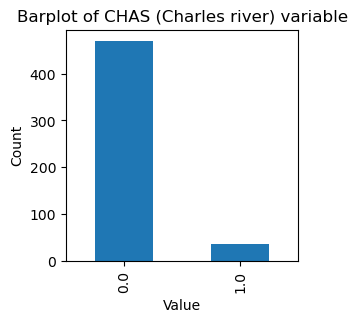

In [7]:
# 4.2. Provide a bar plot for the Charles river variable
boston_df["CHAS"].value_counts().plot(kind='bar', figsize=(3, 3))
plt.title("Barplot of CHAS (Charles river) variable")
plt.xlabel("Value")
plt.ylabel("Count")

Text(0, 0.5, 'MEDV (Median Home Value, k$)')

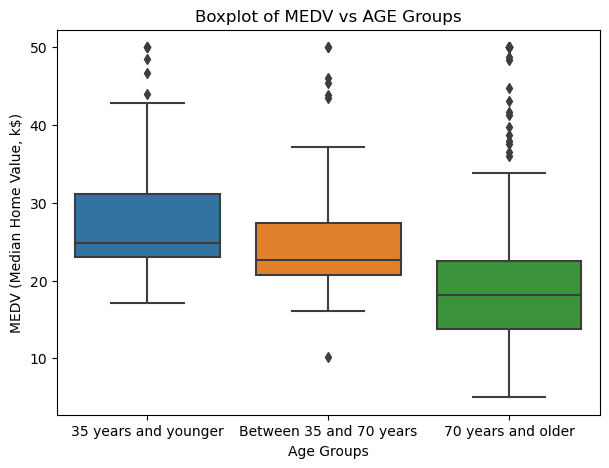

In [8]:
# 4.3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

fix, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(ax=ax, x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('MEDV (Median Home Value, k$)')

Text(0, 0.5, 'NOX')

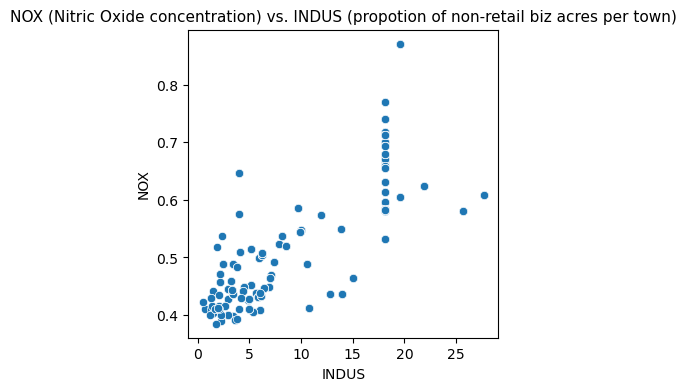

In [9]:
# 4.4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
fix, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(ax=ax, x='INDUS', y='NOX', data=boston_df)
plt.title('NOX (Nitric Oxide concentration) vs. INDUS (propotion of non-retail biz acres per town)', fontsize=11)
plt.xlabel('INDUS')
plt.ylabel('NOX')

# Q: What can you say about the relationship?
# A: 1) There is a positive correlation. 2) The vertical strip at INDUS=18 is intriguing. Data quality issue? 

Text(0, 0.5, 'Count')

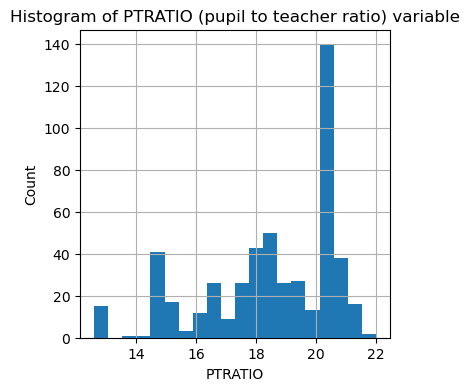

In [10]:
# 4.5. Create a histogram for the pupil to teacher ratio variable
fig, ax = plt.subplots(figsize=(4, 4))
boston_df['PTRATIO'].hist(ax=ax, bins=20)
plt.title("Histogram of PTRATIO (pupil to teacher ratio) variable")
plt.xlabel("PTRATIO")
plt.ylabel("Count")

In [11]:
# Task 5: Use the appropriate tests to answer the questions provided.

# For each of the following questions;
# * Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# * Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# * Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# * What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Be sure to:
# * State your hypothesis.
# * Use α = 0.05
# * Perform the test Statistics.
# * State the conclusion from the test.

In [12]:
# 5.1. Q: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [13]:
# State my hypothesis:
#   Null Hypothesis (H0): There is no significant difference in the median values between the two groups (houses bounded by the Charles River and those not bounded by the river).
#   Alternative Hypothesis (H1): There is significant difference in the median values between the two groups. 

# Perform T-test.
grp1 = boston_df.loc[boston_df['CHAS'] == 1, 'MEDV']
grp2 = boston_df.loc[boston_df['CHAS'] == 0, 'MEDV']
t_stat, p_value = scipy.stats.ttest_ind(grp1, grp2, equal_var=False)

print(f"T-stat: {t_stat}")
print(f"p-value: {p_value}")
print()

# Conclusion from the test. 
def print_conclusion(p_value, alpha=0.05):    
    if p_value < alpha:
        print(f"p-value {p_value:.5f} < alpha {alpha}")
        print("Reject null hypothesis. There is a significant difference in median values between the two groups.")
    else:
        print(f"p-value {p_value:.5f} >= alpha {alpha}")
        print("Fail to reject null hypothesis. There is no significant difference in median values between the two groups.")

print_conclusion(p_value)

T-stat: 3.113291312794837
p-value: 0.003567170098137517

p-value 0.00357 < alpha 0.05
Reject null hypothesis. There is a significant difference in median values between the two groups.


In [14]:
# 5.2. Q: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
# State my hypothesis:
#   Null Hypothesis (H0): There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
#   Alternative Hypothesis (H1): There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE). 

# Divide data into group.
# [Already done in a previous cell, so skip.] boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
groups = []
for group_label in ['35 years and younger', 'Between 35 and 70 years', '70 years and older']:
    groups.append(boston_df.loc[boston_df['AGE_Group'] == group_label, 'MEDV'])

# Perform ANOVA.
f_stat, p_value = scipy.stats.f_oneway(*groups)

print(f"F-stat: {f_stat}")
print(f"p-value: {p_value}")
print()

# Conclusion from the test. 
def print_conclusion(p_value, alpha=0.05):    
    if p_value < alpha:
        print(f"p-value {p_value} < alpha {alpha}")
        print("Reject null hypothesis. There is a significant difference in MEDV between the AGE groups.")
    else:
        print(f"p-value {p_value} >= alpha {alpha}")
        print("Fail to reject null hypothesis. There is no significant difference in MEDV between the AGE groups.")

print_conclusion(p_value)

F-stat: 36.40764999196599
p-value: 1.7105011022702984e-15

p-value 1.7105011022702984e-15 < alpha 0.05
Reject null hypothesis. There is a significant difference in MEDV between the AGE groups.


In [16]:
# 5.3. Q: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [17]:
# State my hypothesis:
#   Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
#   Alternative Hypothesis (H1): There is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 

# Perform Pearson Correlation.
corr_coeff, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Corr Coeff: {corr_coeff}")
print(f"p-value: {p_value}")
print()

# Conclusion from the test. 
def print_conclusion(p_value, alpha=0.05):    
    if p_value < alpha:
        print(f"p-value {p_value} < alpha {alpha}")
        print("Reject null hypothesis. There is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")
    else:
        print(f"p-value {p_value} >= alpha {alpha}")
        print("Fail to reject null hypothesis. There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")

print_conclusion(p_value)

Pearson Corr Coeff: 0.7636514469209151
p-value: 7.913361061239527e-98

p-value 7.913361061239527e-98 < alpha 0.05
Reject null hypothesis. There is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).


In [18]:
# 5.4. Q: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0, 0.5, 'MEDV (Median house values, k$)')

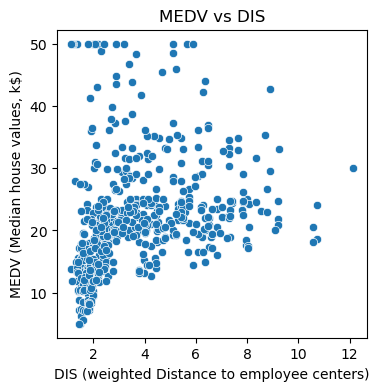

In [19]:
# Scatter plot, a quick check of data. 
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(ax=ax, x='DIS', y='MEDV', data=boston_df)
plt.title('MEDV vs DIS')
plt.xlabel('DIS (weighted Distance to employee centers)')
plt.ylabel('MEDV (Median house values, k$)')

In [20]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", r_value**2)
print("P-value:", p_value)
print()

# Statistical significance. 
alpha = 0.05
if p_value < alpha:
    print(f"p-value {p_value} < alpha {alpha}. Statistically significant.")
else:
    print(f"p-value {p_value} >= alpha {alpha}. Statistically insignificant.")

Slope: 1.0916130158411093
Intercept: 18.390088330493384
R-squared value: 0.06246437212178246
P-value: 1.2066117273371223e-08

p-value 1.2066117273371223e-08 < alpha 0.05. Statistically significant.


Text(9.8, 37, 'y = 1.092 *x + 18.390')

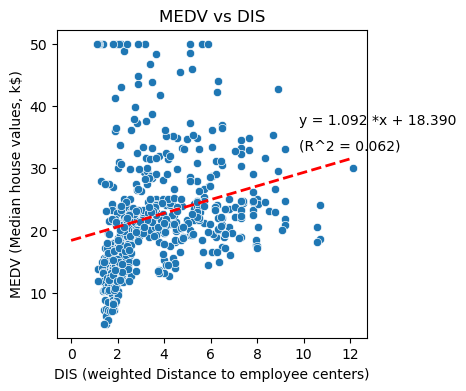

In [21]:
# Overlay linear reg fit line on the scatter plot.
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(ax=ax, x='DIS', y='MEDV', data=boston_df)
plt.title('MEDV vs DIS')
plt.xlabel('DIS (weighted Distance to employee centers)')
plt.ylabel('MEDV (Median house values, k$)')

ax.plot(np.linspace(0, 12, 13), slope*np.linspace(0, 12, 13) + intercept, 'r--', linewidth=2)
ax.text(9.8, 33, f"(R^2 = {r_value**2 :.3f})")
ax.text(9.8, 37, f"y = {slope :.3f} *x + {intercept :.3f}")

In [22]:
# CONCLUSION for Q 5.4: 
#
# There is a modest impact of DIS (weight Distance to the five Boston employment centers) on MEDV (House median values, in k$). 
# Based on linear regression, the relation is MEDV = 1.092 * DIS + 18.390
# Greater DIS corresponds to higher MEDV. 

In [23]:
# Below is a little extra -- wondering if a polynomial fit can better capture the relationship, especially the "dropping head" portion (where DIS <= 3). 

In [24]:
# Perform polynomial fit.
def polyfit(X, y, degree):
    # Perform polynomial fit
    poly_coeffs = np.polyfit(X, y, degree)
    poly_func = np.poly1d(poly_coeffs)
    
    # Calculate residuals
    residuals = y - poly_func(X)
    
    # Perform a linear regression on the residuals
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, residuals)
    
    # F-test for overall significance (p-value)
    n = len(X)
    k = degree + 1      # Number of parameters in the model
    df_model = k - 1    # "df" means Degree of freedom
    df_residual = n - k
    f_stat = (r_value**2 / df_model) / ((1 - r_value**2) / df_residual)
    p_value_f = 1 - scipy.stats.f.cdf(f_stat, df_model, df_residual)

    # Print the p-value for the F-test
    print("p-value for F-test from LinReg on residuals:", p_value_f)
    print(f"R^2 from LinReg on residuals: {r_value**2}")
    print(df_model, df_residual)
    
    return poly_coeffs, f_stat, p_value_f

poly_coeffs, f_stat, p_value = polyfit(boston_df['DIS'], boston_df['MEDV'], degree=3)

p-value for F-test from LinReg on residuals: 1.0
R^2 from LinReg on residuals: 8.156459109273145e-31
3 502


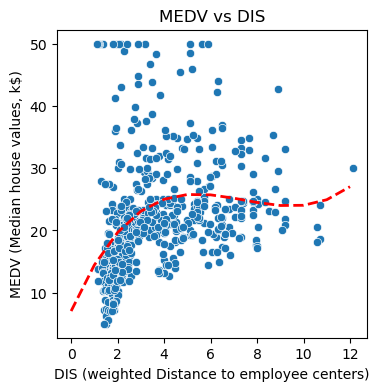

In [25]:
# Overlay linear reg fit line on the scatter plot.
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(ax=ax, x='DIS', y='MEDV', data=boston_df)
plt.title('MEDV vs DIS')
plt.xlabel('DIS (weighted Distance to employee centers)')
plt.ylabel('MEDV (Median house values, k$)')

poly_func = np.poly1d(poly_coeffs)
ax.plot(np.linspace(0, 12, 13), poly_func(np.linspace(0, 12, 13)), 'r--', linewidth=2)
# ax.text(11, 33, f"R^2 = {r_value**2 :.3f}")